In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import lyricsgenius as lg
import os
import pandas as pd
import tools.info
from config import playlists


# 記得在設定完環境變數後要重開 vscode，才不會一直以為自己沒設定成功
id = os.environ.get('spotify_id')
secret = os.environ.get('spotify_secret')
token = os.environ.get('genius_access_token')

# API 連接
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=id, client_secret=secret))
genius = lg.Genius(token)

# 目標 playlist
playlist_url = playlists.personal_playlists()

# 用自定義 function print 目標 playlist info.
for playlist_ in playlist_url:
    tools.info.show_playlist_info(spotify_obj=spotify, playlist_uri=playlist_)

高端渣男把妹開車必聽: 渣dao自己都想對自己犯罪
873人按讚。共133首歌
2021高端渣男必備開車音樂: 
1107人按讚。共68首歌
高端渣男車上歌單: 
31人按讚。共28首歌
高端渣男開車把妹歌單: 
234人按讚。共17首歌
高端渣男開車把妹歌單: 
11人按讚。共125首歌
渣男必備: 
7人按讚。共111首歌
高端渣男歌單: 
4人按讚。共68首歌
高端渣男把妹开车歌单: 
0人按讚。共44首歌


# 取得 playlist information

In [8]:
# import data_preprocessing
# df = data_preprocessing.get_playlist_info_with_lyrics('spotify_id',
#                                                       'spotify_secret',
#                                                       'genius_access_token',
#                                                       search_for_lyrics=False)

# 我已經用下面兩個 chunks 處理過 lyrics 資料了，如果第一次跑可以用 data_preprocessing 的 serach_for_lyrics
# 透過 lyrics genius API 抓歌詞，但因為很花時間所以我直接匯入處理完的 csv

df = pd.read_csv('data\pua_df_lyrics_utf-8-sig.csv')

# Search for lyrics using lyricsGenius API
- don't run this chunk, it takes time.

In [42]:
# def search_song(song_name, artist):
#     song = genius.search_song(title=song_name, artist=artist)
#     if song == None:
#         return 'None'
#     return song.lyrics

# pua_list_df = [i.get_contents() for i in pua]

# for df in pua_list_df:
#     df['lyrics'] = df.apply(lambda x: search_song(x.song_name, x.singer_name), axis=1)

# Save the searching result for next use
- don't run this chunk, if pua_df_lyrics_utf-8-sig.csv exists.

In [49]:
# pua_df = pd.concat(pua_list_df)
# pua_df.to_csv('pua_df_lyrics_utf-8-sig.csv', index=False, encoding='utf-8-sig')

# 使用 opencc 套件，將簡體中文轉為繁體中文

In [9]:
from opencc import OpenCC

cc = OpenCC('s2t') # simplified to tradition Chinese

for column in df:
    df[column] = df[column].apply(lambda x: cc.convert(x).lower())

In [11]:
# 把找不到歌詞的資料去掉
df2 = df[:]
df2.drop(df2[df2.lyrics == 'none'].index, inplace=True)
df2.reset_index(drop=True, inplace=True)

c:\Users\JEFF TU\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [134]:
import jieba
from collections import Counter

def get_all_words(all_lyrics):
    output = []

    for lyrics in all_lyrics:
        words = jieba.lcut(lyrics.replace('\n', " "))
        output.extend(words)
    return output

all_words = get_all_words(df2['lyrics'])


In [245]:
import string
from nltk.corpus import stopwords

punctuations = string.punctuation
punctuations = punctuations + '，' + '’' + ' '
stops = set(stopwords.words('english'))

word_count = Counter(all_words)
punc_list = list(punctuations)

for i in punc_list:
    word_count.pop(i, None)

for i in stops:
    word_count.pop(i, None)

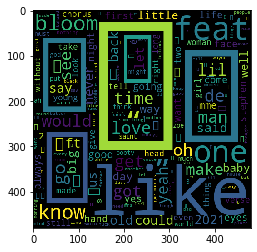

In [249]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

wc = WordCloud(width=480, height=480)
cloud = wc.generate_from_frequencies(word_count)
plt.imshow(cloud)